In [405]:
import os
import carbon_tracker

# Create the emissions folder if it doesn't exist
if not os.path.exists('./emissions'):
	os.makedirs('./emissions')

# #improt file in "Sad-Brain-Analytics-Hackathon\carbon_tracker.py"
# %run carbon_tracker.py
# carbon_tracker.start_tracker()

# **Import libraries:**

In [406]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
carbon_tracker.start_tracker()
carbon_tracker.update_project_name('Import Libraries')

# **EDA:**

In [407]:
df = pd.read_csv("../Sad-Brain-Analytics-Hackathon/dataset/final_depression_dataset_1.csv")
df.head()
carbon_tracker.update_project_name('Read dataset')

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [409]:
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [410]:
df.shape

(2556, 19)

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

### *Handling duplicated:*

In [412]:
df.duplicated().sum()

np.int64(0)

No duplicated values in our dataset

### *Handling null values:*

In [413]:
df.isnull().sum()

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

Before making our decision about how we should handle the null values, let's explore more the relationships between the variables.

In [414]:
df.nunique()

Name                                     216
Gender                                     2
Age                                       43
City                                      30
Working Professional or Student            2
Profession                                35
Academic Pressure                          5
Work Pressure                              5
CGPA                                     312
Study Satisfaction                         5
Job Satisfaction                           5
Sleep Duration                             4
Dietary Habits                             3
Degree                                    27
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64

In [415]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,2556.000000,502.000000,2054.000000,502.000000,502.000000,2054.000000,2556.000000,2556.000000
mean,39.043036,3.003984,3.021908,7.567809,3.075697,3.015093,6.023865,2.968701
std,12.260596,1.390007,1.417312,1.465367,1.373490,1.418432,3.771743,1.415527
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,2.000000,6.210000,2.000000,2.000000,3.000000,2.000000
50%,39.000000,3.000000,3.000000,7.605000,3.000000,3.000000,6.000000,3.000000
75%,50.000000,4.000000,4.000000,8.825000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


**By examining the column names, the null value counts, and count from df.describe(), Academic Pressure, CGPA, & Study Satisfaction have 2054 missing values. We can cross-reference this with df.describe()!**
**The count in df.describe() for these columns: Only 502 non-null entries are present, so based on our context (working professionals vs students), students are expected to have values in Academic Pressure, CGPA, and Study Satisfaction, while working professionals will likely have nulls for these columns, as these are not applicable to them.**

*The count of 502 non-null values in these columns suggests only students are responding to these questions, while working professionals would have nulls in these columns since they don't pertain to them.*

**In the other hand, Work Pressure & Job Satisfaction have 502 missing values, which likely corresponds to the students who don't have professional work pressure or job satisfaction, as they aren't employed yet. From df.describe(), for Work Pressure and Job Satisfaction, the count of non-null values is 2054, suggesting that working professionals are responding to these questions.** 

*The missing values are likely due to students who don’t yet have a job, hence they don't fill out these columns!*

**Also, the column name will not impact our model traainig, so we can drop it,because we will not need it in our analysis**


In [416]:
df = df.drop('Name', axis=1)
df.shape

(2556, 18)

In [417]:
# Check for nulls in columns depending on the value of 'Working Professional or Student'
if 'Working Professional' in df['Working Professional or Student'].values:
    print("Null values for Working Professional related columns:")
    print(df[df['Working Professional or Student'] == 'Working Professional'][['Work Pressure', 'Job Satisfaction']].isnull().sum())

if 'Student' in df['Working Professional or Student'].values:
    print("Null values for Student related columns:")
    print(df[df['Working Professional or Student'] == 'Student'][['Academic Pressure', 'CGPA', 'Study Satisfaction']].isnull().sum())


Null values for Working Professional related columns:
Work Pressure       0
Job Satisfaction    0
dtype: int64
Null values for Student related columns:
Academic Pressure     0
CGPA                  0
Study Satisfaction    0
dtype: int64


**No null values in our dataset**

*For better visualization we will seperate our dataset after based on either the person is a professional worker or student! But for our model we'll work with our current dataset as it is*

## *Datatype Casting:*

In [418]:
import numpy as np

def print_dtype_info():
    # Define types to inspect
    dtypes = [np.int8, np.int16, np.int32, np.int64, np.uint8, np.uint16, 
              np.uint32, np.uint64, np.float16, np.float32, np.float64]
    
    print(f"{'Data Type':<10} {'Size (Bytes)':<12} {'Min Value':<25} {'Max Value':<25}")
    print("-" * 75)
    
    for dtype in dtypes:
        info = np.iinfo(dtype) if np.issubdtype(dtype, np.integer) else np.finfo(dtype)
        print(f"{dtype.__name__:<10} {np.dtype(dtype).itemsize:<12} {info.min:<25} {info.max:<25}")

print_dtype_info()


Data Type  Size (Bytes) Min Value                 Max Value                
---------------------------------------------------------------------------
int8       1            -128                      127                      
int16      2            -32768                    32767                    
int32      4            -2147483648               2147483647               
int64      8            -9223372036854775808      9223372036854775807      
uint8      1            0                         255                      
uint16     2            0                         65535                    
uint32     4            0                         4294967295               
uint64     8            0                         18446744073709551615     
float16    2            -65504.0                  65504.0                  
float32    4            -3.4028234663852886e+38   3.4028234663852886e+38   
float64    8            -1.7976931348623157e+308  1.7976931348623157e+308  


 *For memory efficiency, string dtype is more efficient than object because it is optimized for text data, while object dtype can store mixed types but uses more memory for purely textual data*

In [419]:
def calculate_memory(df):
    mem_usage = df.memory_usage(deep=True).sum()
    return mem_usage


In [420]:
df['Profession'] = df['Profession'].fillna('Uknown')

In [421]:
initial_memory = calculate_memory(df)
print(f"Memory usage before type conversions: {initial_memory} bytes")

df['Sleep Duration'] = df['Sleep Duration'].astype('string')
df['Dietary Habits'] = df['Dietary Habits'].astype('string')
df['Degree'] = df['Degree'].astype('string')
df['City'] = df['City'].astype('string')

df['Age'] = df['Age'].astype('int16')  # Better for larger numbers
df['Work/Study Hours'] = df['Work/Study Hours'].astype('int16')
df['Financial Stress'] = df['Financial Stress'].astype('int8')

# Handle potential float to int conversion safely
df['Work Pressure'] = df['Work Pressure'].fillna(0).round().astype('int8')
df['Job Satisfaction'] = df['Job Satisfaction'].fillna(0).round().astype('int8')

# Categorical conversions
df['Gender'] = df['Gender'].astype('category')
df['Working Professional or Student'] = df['Working Professional or Student'].astype('category')
df['Profession'] = df['Profession'].astype('category')
df['Depression'] = df['Depression'].astype('category')
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype('category')
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype('category')
final_memory = calculate_memory(df)
print(f"Memory usage after type conversions: {final_memory} bytes")

# Memory savings
memory_saved = initial_memory - final_memory
print(f"Memory saved: {memory_saved} bytes ({(memory_saved / initial_memory) * 100:.2f}% reduction)")

Memory usage before type conversions: 1598700 bytes
Memory usage after type conversions: 682240 bytes
Memory saved: 916460 bytes (57.33% reduction)


### *Detect & Remove outliers:*

Based on the describe() summary, the statistical range for numeric columns (min, max, and percentiles) is consistent with expected data distribution, suggesting no significant outliers in the dataset.

<Axes: ylabel='Financial Stress'>

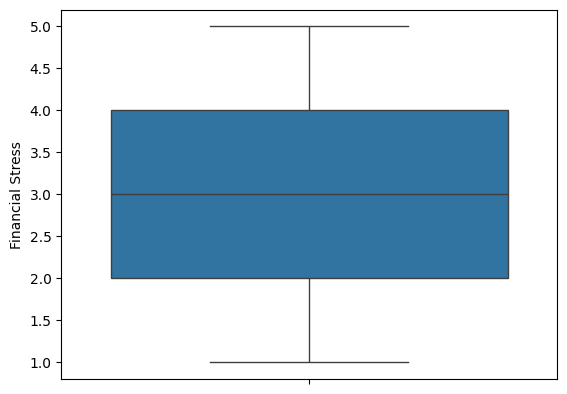

In [422]:
sns.boxplot(df['Financial Stress'])

<Axes: xlabel='Age'>

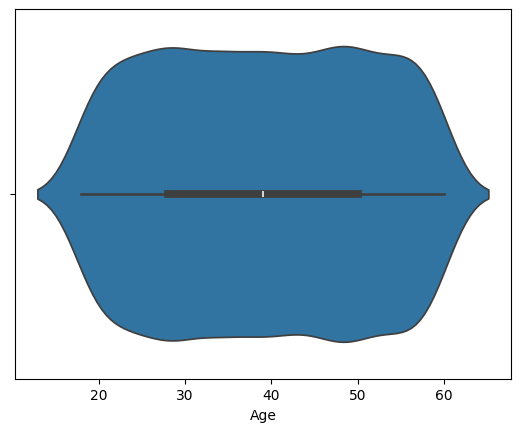

In [423]:
sns.violinplot(data=df, x="Age")

<Axes: xlabel='Work Pressure'>

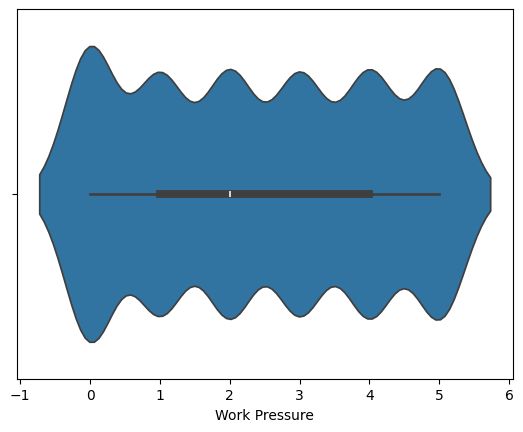

In [424]:
sns.violinplot(data=df, x='Work Pressure')

<Axes: xlabel='Job Satisfaction'>

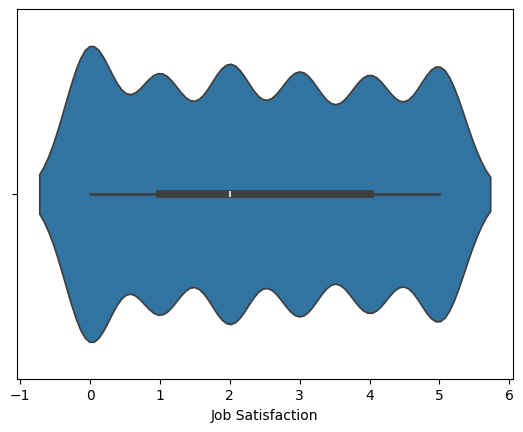

In [425]:
sns.violinplot(data=df, x='Job Satisfaction')

<Axes: xlabel='Work/Study Hours'>

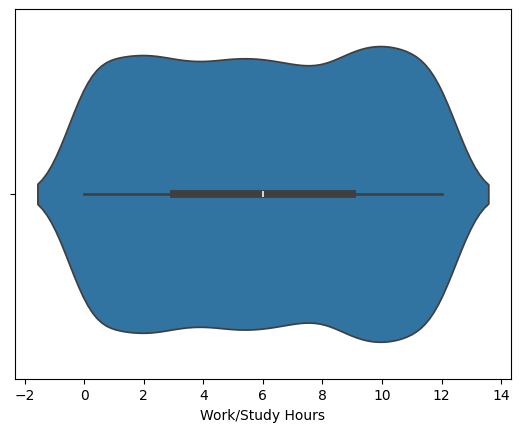

In [426]:
sns.violinplot(data=df, x='Work/Study Hours')

<Axes: xlabel='Financial Stress'>

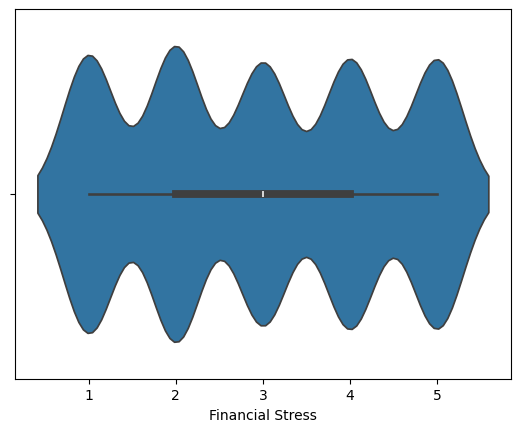

In [427]:
sns.violinplot(data=df, x='Financial Stress')

In [428]:
df['Degree'].unique()

<StringArray>
[      'MA',    'B.Com',    'M.Com',       'MD',       'BE',      'MCA',
       'BA',      'LLM',      'BCA', 'Class 12',     'B.Ed',   'M.Tech',
      'LLB',   'B.Arch',       'ME',      'MBA',  'M.Pharm',     'MBBS',
      'PhD',      'BSc',      'MSc',      'MHM',      'BBA',      'BHM',
   'B.Tech',     'M.Ed',  'B.Pharm']
Length: 27, dtype: string

### *Grouping columns into categories:*

*This step is for our dashboard to ensure fluid visualization. However, for our model training, we will keep the current dataset as it is. Therefore, let's make a copy of it to proceed*

In [429]:
df_for_visualization = df.copy()

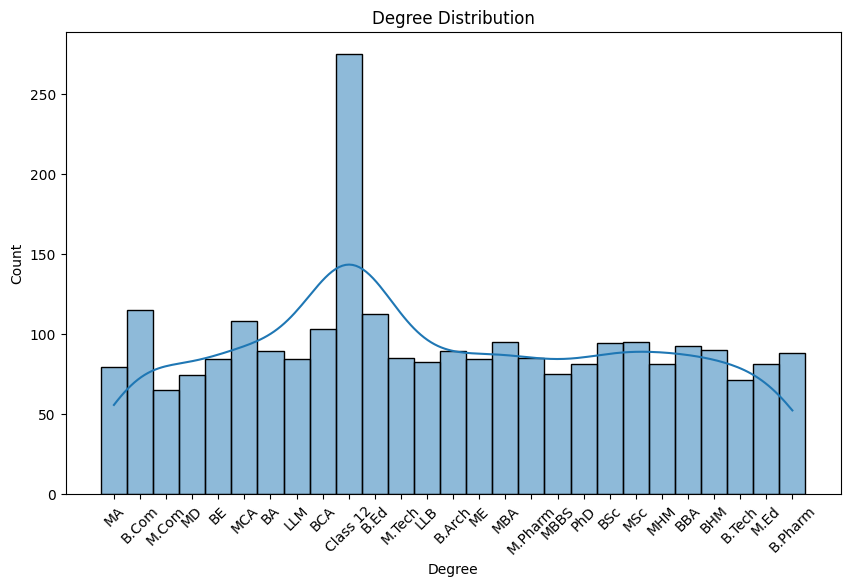

In [430]:
plt.figure(figsize=(10, 6))
sns.histplot(df_for_visualization['Degree'], bins=10, kde=True)  # kde=True adds a smooth curve for better visualization
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [431]:
def categorize_degree(degree):
    # Pre-University (Class 12)
    pre_university_degrees = ['Class 12']
    
    # Undergraduate degrees
    undergrad_degrees = [
        'B.Com', 'BA', 'B.Tech', 'B.Sc', 'B.Arch', 'B.Ed', 
        'B.Pharm', 'LLB', 'BBA', 'BHM', 'BE', 'BCA'
    ]
    
    # Postgraduate degrees
    postgrad_degrees = [
        'M.Com', 'MA', 'M.Tech', 'M.Sc', 'M.Ed', 'MBA', 
        'MCA', 'LLM', 'ME', 'MHM', 'M.Pharm'
    ]
    
    # Doctorate & Professional
    doctorate_degrees = ['PhD', 'MD', 'MBBS']

    # Categorization logic
    if degree in pre_university_degrees:
        return 'Pre-University'
    elif degree in undergrad_degrees:
        return 'Undergraduate'
    elif degree in postgrad_degrees:
        return 'Postgraduate'
    elif degree in doctorate_degrees:
        return 'Doctorate/Professional'
    else:
        return 'Other'

# Apply categorization
df_for_visualization['Degree'] = df_for_visualization['Degree'].apply(categorize_degree)



In [432]:
# Group the data by Degree and calculate mean (or median) for certain features
degree_analysis = df_for_visualization.groupby('Degree').agg({
    'Job Satisfaction' : 'mean',
    'Work Pressure' : 'mean',
    'Study Satisfaction' : 'mean',
    'Academic Pressure' : 'mean'
})
degree_analysis


,Job Satisfaction,Work Pressure,Study Satisfaction,Academic Pressure
Degree,,,,
Doctorate/Professional,2.413043,2.434783,2.818182,3.000000
Other,2.439153,2.492063,2.837838,2.918919
Postgraduate,2.546635,2.574970,3.133858,2.897638
Pre-University,1.974545,1.949091,3.211538,3.173077
Undergraduate,2.440394,2.422660,3.068421,3.000000


*Let's do same for Ages*

### *Categorize Ages:*

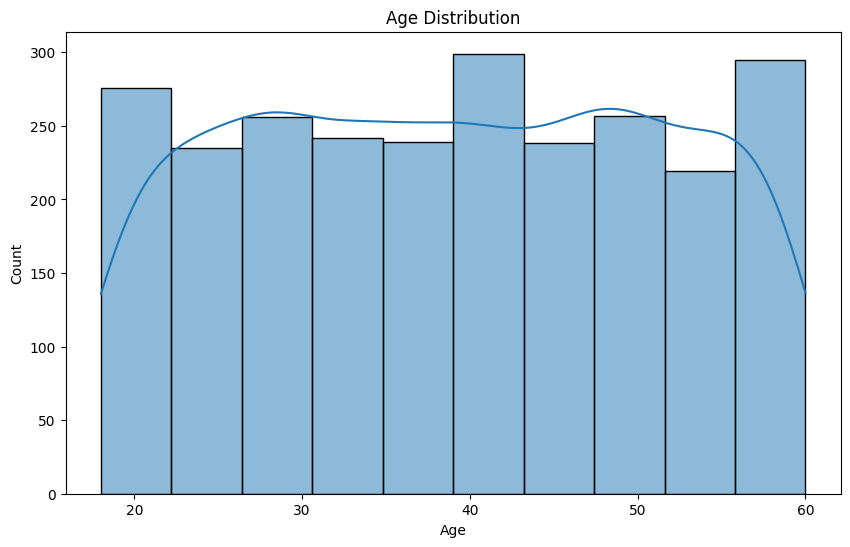

In [433]:
plt.figure(figsize=(10, 6))
sns.histplot(df_for_visualization['Age'], bins=10, kde=True)  # kde=True adds a smooth curve for better visualization
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [434]:
# Define age group bins and labels
bins = [0, 29, 44, 54, 65, float('inf')]
labels = ['Under 25', '25-34', '35-44', '45-54', '55+']

# Assign age groups using pd.cut
df_for_visualization['Age'] = pd.cut(df_for_visualization['Age'], bins=bins, labels=labels, include_lowest=True)



In [435]:
age_analysis = df_for_visualization.groupby('Age').agg({
    'Study Satisfaction' : 'mean',
    'Academic Pressure' : 'mean',
    'Job Satisfaction' : 'mean',
    'Work Pressure' : 'mean'
 })
age_analysis

C:\Users\oo\AppData\Local\Temp\ipykernel_25756\3283256678.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df_for_visualization.groupby('Age').agg({


,Study Satisfaction,Academic Pressure,Job Satisfaction,Work Pressure
Age,,,,
Under 25,3.062500,2.997159,1.570225,1.523876
25-34,3.106667,3.020000,2.531603,2.486456
35-44,NaN,NaN,2.937908,3.068627
45-54,NaN,NaN,2.988439,3.008671
55+,NaN,NaN,NaN,NaN


*From the observed patterns in the data distribution and variable dependencies, we can reasonably conclude that our initial hypothesis about the independence between study-related and work-related variables holds.The clear trends and differences observed across age groups in the visualizations further support the distinction between professional and student datasets. These insights validate our decision to handle these variables differently during data preparation and model development, enabling a tailored approach based on distinct characteristics of each group.*

In [436]:
#Rename Work/Study Hours are just number of activity hours for Workers & Students, let's just rename it
df_for_visualization.rename(columns={'Work/Study Hours': 'Activity Hours'}, inplace=True)

*Before splitting the dataset into Working Professionals and Students, we conducted an initial Exploratory Data Analysis (EDA) to understand the relationships between variables and identify any patterns or insights that would help guide our approach.*

**Summary of the steps:**
- Initial Data Exploration 
- Identifying Patterns and Dependencies
- Variable Dependencies (exploring the relationships between different features)
- Exploring the Dataset by Category (To ensure we were correctly capturing the differences between the two groups, we looked at the distribution of categorical variables such as Degree)

### Generate Report for the cleaned data set using ydata-profiling:

In [437]:
# from ydata_profiling import ProfileReport
# from ydata_profiling.utils.cache import cache_file
# report=ProfileReport(dff,title="Sad Brain Analytics", explorative=True)
# report.to_file("sad_brain_analytics.html")

In [438]:
# Dataset for Working Professionals: drop unnecessary columns
df_work_professionals = df_for_visualization[df_for_visualization['Working Professional or Student'] == 'Working Professional']
df_work_professionals = df_work_professionals.drop(columns=['Academic Pressure', 'Study Satisfaction', 'CGPA'])

# Dataset for Students: drop unnecessary columns
df_students = df_for_visualization[df_for_visualization['Working Professional or Student'] == 'Student']
df_students = df_students.drop(columns=['Work Pressure', 'Job Satisfaction', 'Profession'])


In [439]:
# df_work_professionals.to_csv('df_work_professionals.csv', index=False)
# df_students.to_csv('df_students.csv', index=False)


In [440]:
# carbon_tracker.update_project_name('EDA')
# carbon_tracker.update_project_name('EDA')

**Now both datasets are clean and ready for visuaalization & training**


### **Data Visualization:**

Check link here

## **Model Training:**

In [441]:
df_for_training = df.copy()

In [442]:
df_for_training = pd.get_dummies(df_for_training, columns=['Gender', 'Profession', 'Working Professional or Student', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression', ], drop_first=True)

diet_mapping = {'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2}
df_for_training['Dietary Habits'] = df_for_training['Dietary Habits'].map(diet_mapping)


In [443]:
city_population = {
    'Srinagar': 1, 'Meerut': 2, 'Rajkot': 3, 'Vadodara': 4, 'Varanasi': 5, 
    'Faridabad': 6, 'Ludhiana': 7, 'Patna': 8, 'Lucknow': 9, 'Kanpur': 10,
    'Indore': 11, 'Bhopal': 12, 'Agra': 13, 'Thane': 14, 'Kalyan': 15,
    'Nashik': 16, 'Nagpur': 17, 'Surat': 18, 'Ahmedabad': 19, 'Delhi': 20,
    'Jaipur': 21, 'Hyderabad': 22, 'Chennai': 23, 'Kolkata': 24, 'Pune': 25, 
    'Visakhapatnam': 26, 'Vasai-Virar': 27, 'Ghaziabad': 28, 'Mumbai': 29, 
    'Bangalore': 30
}

# Encode cities based on their population ranking (smallest first)
df_for_training['City'] = df_for_training['City'].map(city_population)
df_for_training.head()


,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Gender_Male,Profession_Architect,Profession_Business Analyst,Profession_Chef,Profession_Chemist,Profession_Civil Engineer,Profession_Consultant,Profession_Content Writer,Profession_Customer Support,Profession_Data Scientist,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Electrician,Profession_Entrepreneur,Profession_Finanancial Analyst,Profession_Financial Analyst,Profession_Graphic Designer,Profession_HR Manager,Profession_Investment Banker,Profession_Judge,Profession_Lawyer,Profession_Manager,Profession_Marketing Manager,Profession_Mechanical Engineer,Profession_Pharmacist,Profession_Pilot,Profession_Plumber,Profession_Research Analyst,Profession_Researcher,Profession_Sales Executive,Profession_Software Engineer,Profession_Teacher,Profession_Travel Consultant,Profession_UX/UI Designer,Profession_Uknown,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Depression_Yes
0,37,28,NaN,2,NaN,NaN,4,7-8 hours,1,MA,6,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1,60,15,NaN,4,NaN,NaN,3,5-6 hours,0,B.Com,0,4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
2,42,12,NaN,2,NaN,NaN,3,5-6 hours,1,M.Com,0,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
3,44,14,NaN,3,NaN,NaN,5,7-8 hours,2,MD,1,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False
4,48,11,NaN,4,NaN,NaN,3,7-8 hours,1,BE,6,5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False


*for our model training, we will use different models and choose the one having the better accuracy*

### **Preprocessing data:**

In [444]:
from sklearn.preprocessing import StandardScaler

# Initialise Scaler
scaler = StandardScaler()

In [445]:
df_for_training['Age'] = scaler.fit_transform(df_for_training[['Age']])

In [446]:
sleep_mapping = {
    'Less than 5 hours': 0,  # Worst
    '5-6 hours': 1,
    '7-8 hours': 2,  # Ideal Sleep
    'More than 8 hours': 3  # Excessive Sleep
}

df_for_training['Sleep_Duration_Encoded'] = df_for_training['Sleep Duration'].map(sleep_mapping)

In [447]:
df_for_training.drop(columns=['Sleep Duration'], inplace=True)

In [448]:
# Define degree categories with a fallback for unknown degrees
def categorize_degree(degree):
    if degree == 'Class 12':
        return 'Class 12 (High School)'  # Category 1
    elif degree in ['BA', 'B.Com', 'BCA', 'BSc', 'BBA', 'BHM', 'B.Tech', 'BE', 'B.Arch', 'B.Pharm', 'B.Ed']:
        return 'Basic Degree (Undergraduate)'  # Category 2
    elif degree in ['ME', 'MA', 'M.Com', 'MCA', 'MSc', 'M.Ed', 'MBA', 'M.Pharm', 'MHM', 'M.Tech', 'LLM']:
        return 'Postgraduate Degree (Master\'s Level)'  # Category 3
    elif degree in ['MD', 'MBBS', 'LLB']:
        return 'Professional Degree'  # Category 4
    elif degree == 'PhD':
        return 'Doctoral Degree (PhD Level)'  # Category 5


# Apply the categorization function
df_for_training['Degree_Category'] = df_for_training['Degree'].apply(categorize_degree)

degree_order = {
    'Class 12 (High School)': 0,
    'Basic Degree (Undergraduate)': 1,
    'Postgraduate Degree (Master\'s Level)': 2,
    'Professional Degree': 3,
    'Doctoral Degree (PhD Level)': 4
}

df_for_training['Degree_Category'] = df_for_training['Degree_Category'].map(degree_order)


In [449]:
df_for_training.drop(columns=['Degree'], inplace=True)

In [450]:
# Merge Academic Pressure with Work Pressure
df_for_training['Total_Pressure'] = df_for_training['Academic Pressure'].fillna(0) + df_for_training['Work Pressure']

# Merge Work Satisfaction with Study Satisfaction
df_for_training['Total_Satisfaction'] = df_for_training['Study Satisfaction'].fillna(0) + df_for_training['Job Satisfaction']

# Drop the original columns if no longer needed
df_for_training.drop(columns=['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction'], inplace=True)

df_for_training.head()

,Age,City,CGPA,Dietary Habits,Work/Study Hours,Financial Stress,Gender_Male,Profession_Architect,Profession_Business Analyst,Profession_Chef,Profession_Chemist,Profession_Civil Engineer,Profession_Consultant,Profession_Content Writer,Profession_Customer Support,Profession_Data Scientist,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Electrician,Profession_Entrepreneur,Profession_Finanancial Analyst,Profession_Financial Analyst,Profession_Graphic Designer,Profession_HR Manager,Profession_Investment Banker,Profession_Judge,Profession_Lawyer,Profession_Manager,Profession_Marketing Manager,Profession_Mechanical Engineer,Profession_Pharmacist,Profession_Pilot,Profession_Plumber,Profession_Research Analyst,Profession_Researcher,Profession_Sales Executive,Profession_Software Engineer,Profession_Teacher,Profession_Travel Consultant,Profession_UX/UI Designer,Profession_Uknown,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Depression_Yes,Sleep_Duration_Encoded,Degree_Category,Total_Pressure,Total_Satisfaction
0,-0.166667,28,NaN,1,6,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,2,2,2.0,4.0
1,1.709629,15,NaN,0,0,4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,1,1,4.0,3.0
2,0.241223,12,NaN,1,0,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,1,2,2.0,3.0
3,0.404380,14,NaN,2,1,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,2,3,3.0,5.0
4,0.730692,11,NaN,1,6,5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,2,1,4.0,3.0


In [451]:
df_for_training.drop(columns= 'CGPA', inplace=True)

### *First model will be LogisticRegression*

In [452]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Cross-validation score (mean): 0.9905
Accuracy: 98.65%
Precision (Weighted): 0.9865
Recall (Weighted): 0.9865
F1-Score: 0.9865

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       616
        True       0.99      0.99      0.99       645

    accuracy                           0.99      1261
   macro avg       0.99      0.99      0.99      1261
weighted avg       0.99      0.99      0.99      1261



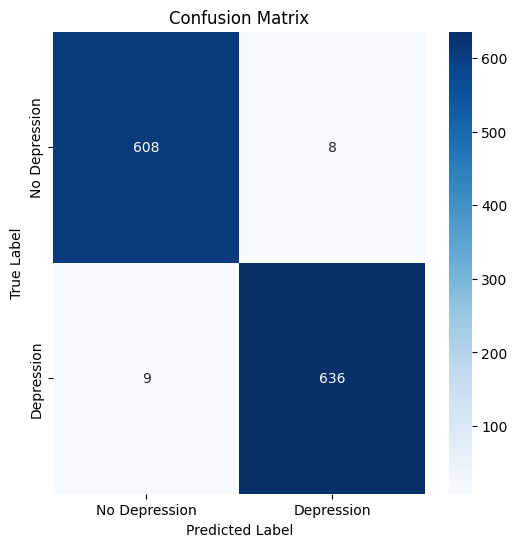


Feature Importance:
                                              Feature  Importance
42          Have you ever had suicidal thoughts ?_Yes   20.346453
46                                     Total_Pressure    6.299960
17                  Profession_Educational Consultant    5.559410
43               Family History of Mental Illness_Yes    5.317802
40                                  Profession_Uknown    4.265707
4                                    Financial Stress    3.908086
7                         Profession_Business Analyst    2.763838
32                                 Profession_Plumber    2.659984
22                        Profession_Graphic Designer    2.572327
28                       Profession_Marketing Manager    2.451721
16                                  Profession_Doctor    2.055182
6                                Profession_Architect    1.858447
37                                 Profession_Teacher    1.516726
8                                     Profession_Chef  

In [453]:
# df_for_training must contain the features and the target column "Depression_Yes"
X = df_for_training.drop(columns=['Depression_Yes'])
y = df_for_training['Depression_Yes']

# Balance the classes with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into train/test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=30)

# Define the logistic regression model
model = LogisticRegression(solver='liblinear')

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best parameters: {grid_search.best_params_}")

# Train the best model found
best_model = grid_search.best_estimator_

# Cross-validation (5-fold cross-validation)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation score (mean): {np.mean(cv_scores):.4f}")

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Display the model coefficients
feature_importance = best_model.coef_[0]  # Model coefficients
feature_names = X.columns  # Feature names

# Create a DataFrame to display the feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)


### *Second Model will be SVM Model*

In [454]:
from sklearn.svm import SVC

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Cross-validation score (average): 0.9905
Accuracy: 98.49%
Precision (Weighted): 0.9849
Recall (Weighted): 0.9849
F1-Score: 0.9849

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       616
        True       0.99      0.98      0.99       645

    accuracy                           0.98      1261
   macro avg       0.98      0.98      0.98      1261
weighted avg       0.98      0.98      0.98      1261



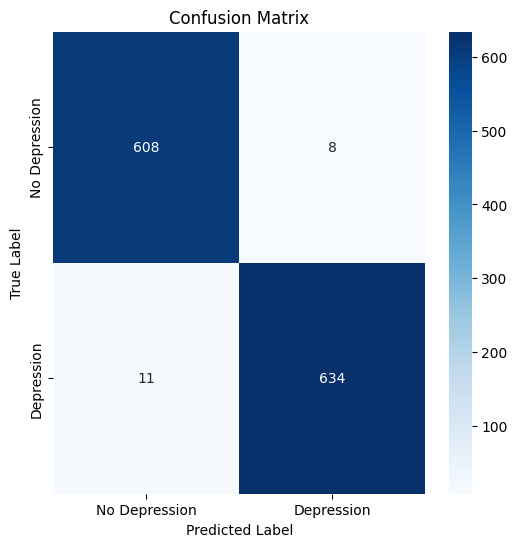


Feature Importance:
                                              Feature  Importance
42          Have you ever had suicidal thoughts ?_Yes    9.393296
17                  Profession_Educational Consultant    3.475003
46                                     Total_Pressure    3.012596
43               Family History of Mental Illness_Yes    2.472753
32                                 Profession_Plumber    2.439283
40                                  Profession_Uknown    2.199141
4                                    Financial Stress    1.871207
6                                Profession_Architect    1.657849
16                                  Profession_Doctor    1.628365
37                                 Profession_Teacher    1.622234
28                       Profession_Marketing Manager    1.589107
22                        Profession_Graphic Designer    1.515600
29                     Profession_Mechanical Engineer    1.303644
7                         Profession_Business Analyst  

In [455]:
X = df_for_training.drop(columns=['Depression_Yes'])
y = df_for_training['Depression_Yes']

# Balancing the classes with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the data into train/test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=30)

# Defining the SVM model
model = SVC()

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best parameters: {grid_search.best_params_}")

# Training the best model found
best_model = grid_search.best_estimator_

# Cross-validation (5-fold cross-validation)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation score (average): {np.mean(cv_scores):.4f}")

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Display feature coefficients if kernel = 'linear'
if best_model.kernel == 'linear':
    feature_importance = best_model.coef_[0]  # Model coefficients
    feature_names = X.columns  # Feature names

    # Creating a DataFrame to display feature importance
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    print("\nFeature Importance:")
    print(importance_df)


## **Summary:**

Based on the results, the Logistic Regression model demonstrates the highest accuracy and will be selected as the final model for this analysis.